In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.stats import chi2
import os.path as path
import wget

In [2]:
!rm Data/Minimos.dat
file = 'Data/Minimos.dat'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'
if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 521 / 521File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]
N = len(x)
sigma = np.array([ 2. for i in range(N) ])
sigma = np.random.uniform(1,5,size=N)
sigma

array([1.01766481, 2.00269139, 3.80173021, 1.89309735, 4.23147282,
       1.93121226, 4.48141887, 3.44881119, 4.69898856, 1.25696673,
       4.4591297 , 3.46909543, 3.94904254, 2.04406408, 4.72863657,
       1.27187059, 4.55350031, 2.16521005, 2.79816133, 2.73271366])

<ErrorbarContainer object of 3 artists>

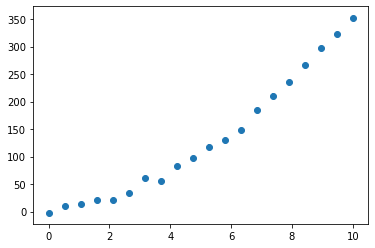

In [4]:
plt.errorbar(x,y,yerr=sigma,fmt='o')

In [5]:
def GetFit(x,y,n):
    
    DataSize = x.shape[0]
    
    b = y
    
    A = np.ones((DataSize,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    AT = np.dot(A.T,A)
    bT = A.T @ b

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [6]:
param = GetFit(x,y,2)
param

array([1.22132054, 6.09075205, 2.9565874 ])

In [7]:
def GetModel(x,p):
    
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [8]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

2.95658740177385*x**2 + 6.0907520463624*x + 1.2213205361703

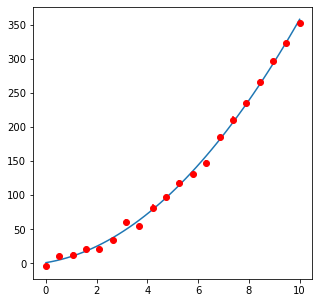

In [9]:
t = np.linspace(np.min(x),np.max(x),50)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.errorbar(x,y,yerr=sigma,fmt='o',color='r')
ax.plot(t,GetModel(t,param))

In [10]:
def GetChi2(x,y,sigma,p,reducido=True):
    
    df  = (len(x) -  len(p) - 1)
    
    if not reducido:
        return np.sum( ( (y - GetModel(x,p))/sigma  )**2 )
    else:
        return np.sum( ( (y - GetModel(x,p))/sigma  )**2 )/df

In [11]:
GetChi2(x,y,sigma,param)

4.576550900402449

In [12]:
Vector_Chi2 = np.array([])
nparam = 18

for i in range(2,nparam):
    
    param = GetFit(x,y,i-1)
    Chi2 = GetChi2(x,y,sigma,param)
    Vector_Chi2= np.append(Vector_Chi2 , Chi2)
    if i == 5:
        print(GetModel(X,param))

print(Vector_Chi2)

-0.0344043618490462*x**4 + 0.657586862575601*x**3 - 0.938528494399337*x**2 + 13.429051533601*x - 0.994299438458829
[201.47511066   4.5765509    5.37237622   3.50589501   4.22611989
   3.35157162   3.31597723   3.65211958   4.01370423   4.54519956
   4.79846811   5.46948199   8.64902866  10.10295222  12.56215427
  18.22845556]


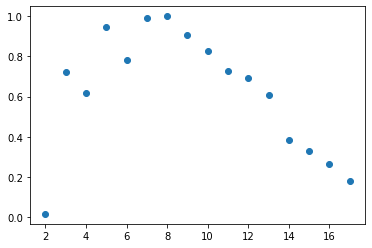

In [13]:
plt.scatter(np.arange(2,nparam,1),np.min(Vector_Chi2)/Vector_Chi2)